In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10 ,activation='softmax')
])

In [3]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2934 - accuracy: 0.9154 - val_loss: 0.1385 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9596 - val_loss: 0.0977 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9685 - val_loss: 0.0843 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9743 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9765 - val_loss: 0.0775 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0784 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0741 - val_accuracy:

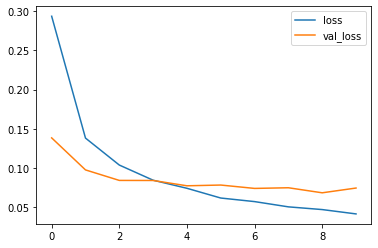

In [8]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

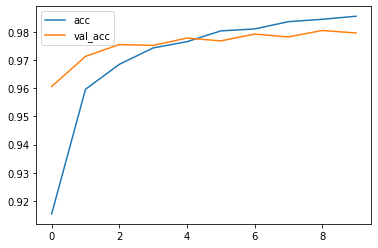

In [9]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [10]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9796
[0.07459487020969391, 0.9796000123023987]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 969    1    1    1    2    1    2    1    1    1]
 [   0 1127    3    1    0    1    2    1    0    0]
 [   2    2 1010    3    2    1    1    7    3    1]
 [   0    0    4  987    0    4    0    6    4    5]
 [   1    0    3    1  964    0    3    1    0    9]
 [   2    0    0    7    1  874    3    1    2    2]
 [   3    3    0    1    4    6  941    0    0    0]
 [   2    3    9    4    0    0    0 1003    1    6]
 [   1    1    3    5    2    9    1    5  944    3]
 [   2    3    0    8    8    4    0    6    1  977]]


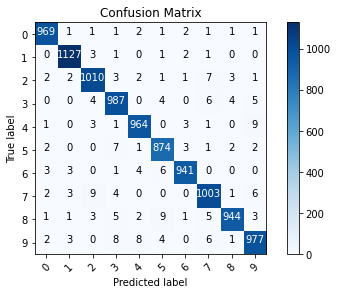

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 0  Predicted label: 3')

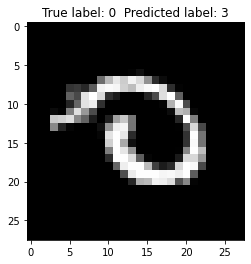

In [16]:
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s  Predicted label: %s'%(y_test[i],p_test[i]))